In [1]:
pip install pandas_profiling

     |████████████████████████████████| 262 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 14.5 MB/s ta 0:00:01
     |████████████████████████████████| 709 kB 55.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 75.0 MB/s eta 0:00:01
     |████████████████████████████████| 812 kB 66.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 65.7 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=5984833dbd6ab8ac8ab2e4ff8c013ef61abf3b0aae67d53e83abe52da532f5b9
  Stored in directory: /home/jovyan/.cache/pip/wheels/1d/05/04/c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=a3afba3a986c21f8d15ee875b41c44a2fc20aadd1d434df696700a6243db0c0f
  Stored in directory: /home/jovyan/.cache/pip/wheels/51/f9/a5/740af2fdb0ad1edf79aabdc41531

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

np.random.seed(1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты на месте

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [5]:
df_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [6]:
df_2 = pd.read_csv('/datasets/geo_data_2.csv')

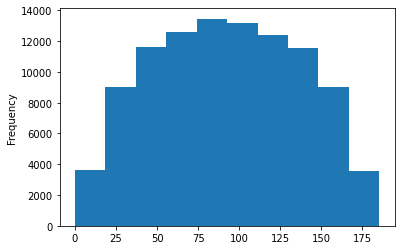

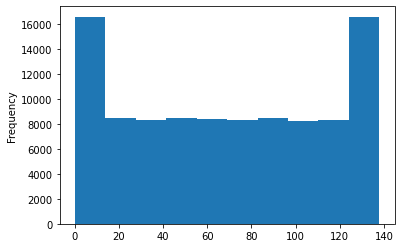

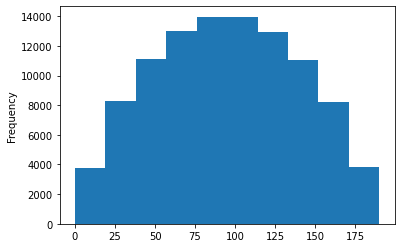

In [7]:
for i in [df_0, df_1, df_2]:
    i['product'].plot.hist()
    plt.show()

In [8]:
pandas_profiling.ProfileReport(df_0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
pandas_profiling.ProfileReport(df_1)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
pandas_profiling.ProfileReport(df_2)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Пропущенных значений нет, все признаки относятся к числовым

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные осмотрены хорошим инструментом - главное не злоупотрелять

## Обучение и проверка модели

<div class="alert alert-block alert-warning">
<b>Изменения:</b> создан метод, который обучает модель по переданному датасету и возращает датасет с предсказаниями и реальными значениями.
</div>

In [49]:
def train_model(df):
    df_train = df.drop('id', axis=1)
    features = df_train.drop('product', axis=1)
    target = df_train['product']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                        test_size=0.25)
    standart = StandardScaler().fit(X_train)
    X_train = standart.transform(X_train)
    X_test = standart.transform(X_test)
    features_standart = standart.transform(features)

    model = LinearRegression()
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    
    df_predict_target = pd.DataFrame({'predict':predict, 'target':y_test})    
    
    print('RMSE на тестовой выборке: ',
          mean_squared_error(y_test, predict, squared=False)
         )
    print('Среднее предсказанное значение:', predict.mean())
    print('Среднее истинное значение:', y_test.mean())
    
    return df_predict_target

<div class="alert alert-block alert-danger">
<b>Ошибка[2]:</b> test_size должен быть 0.25 =)

In [50]:
df_predict_target_0 = train_model(df_0)

RMSE на тестовой выборке:  37.701704726776946
Среднее предсказанное значение: 92.54518595470712
Среднее истинное значение: 92.7927352549592


In [51]:
df_predict_target_1 = train_model(df_1)

RMSE на тестовой выборке:  0.8878140129343551
Среднее предсказанное значение: 68.9131691968597
Среднее истинное значение: 68.9154413218367


In [52]:
df_predict_target_2 = train_model(df_2)

RMSE на тестовой выборке:  39.73944568838454
Среднее предсказанное значение: 94.95520150239011
Среднее истинное значение: 94.70934174168322


<div class="alert alert-block alert-warning">
Среднее предсказанное значение и среднее истинное значение во всех случах близки друг к другу. 
    
RMSE значительно отличается. Наибольшее значение RMSE на 3 областе (95), наименьшее на 2 областе (0.88). 

<div class="alert alert-block alert-warning">
<b>Изменения:</b> все что ниже до конца раздела главы я просто закомментирую за ненадобностью
</div>

In [16]:
df_0_drop = df_0.drop('id', axis=1)

In [17]:
features = df_0_drop.drop('product', axis=1)
target = df_0_drop['product']

In [18]:
standart = StandardScaler().fit(features)
features = standart.transform(features)

In [19]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(features, target, 
                                                          test_size=0.75)

In [20]:
print(len(X_train_valid))
len(X_test)

Попробуем найти предсказания на нескольких моделях.

In [21]:
model_leanir = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()

In [22]:
parametrs_leanir = {'positive':[True, False]}
parametrs_ridge = {'positive':[True, False], 'alpha':list(np.arange(0.01, 10, 0.1))}
parametrs_lasso = {'positive':[True, False], 'alpha':list(np.arange(0.01, 10, 0.1))}

In [23]:
def train_model(model, parametrs):
    grid_model = GridSearchCV(model, parametrs, cv=5, 
                          scoring='neg_root_mean_squared_error'
                             )
    grid_model.fit(X_train_valid, y_train_valid)
    predict = grid_model.best_estimator_.predict(X_test)
    print('Лучшие параметры:', grid_model.best_params_)
    print('RMSE на валидационной выборке:', grid_model.best_score_)
    print('RMSE на тестовой выборке: ',
          mean_squared_error(y_test, predict, squared=False)
         )
    print('Среднее предсказанное значение:', predict.mean())
    return grid_model

In [24]:
grid_leanir = train_model(model_leanir, parametrs_leanir)

In [25]:
grid_ridge = train_model(model_ridge, parametrs_ridge)

In [26]:
grid_lasso = train_model(model_lasso, parametrs_lasso)

Эффективность моделей по RMSE фактически идентична, несмотря на разный подход к регуляризации...
Для дальнейшей работы будем использовать LinearRegression, как наиболее простую и эффективную.

## Подготовка к расчёту прибыли

Создадим метод для подготовки данных вместе со стандартизацией признаков.

<div class="alert alert-block alert-warning">
<b>Изменения:</b> сохраним в отдельные переменные доходность одной ед. product и стоимость разработки одного региона 
</div>

In [27]:
COST_ONE_PRODUCT = 450 * 10**3

In [28]:
PRISE_AREA = 10**10

In [29]:
PRISE_AREA / COST_ONE_PRODUCT 

22222.222222222223

In [30]:
PRISE_AREA / (COST_ONE_PRODUCT * 200)

111.11111111111111

Для безубыточной деятельности необходимо добыть 22222.223 ед. продукции с 200 вышек или 111.112 ед. с каждой вышки.

In [31]:
[x.mean() for x in [df_0['product'], df_1['product'], df_2['product']]]

[92.50000000000001, 68.82500000000002, 95.00000000000004]

Средний объем ед. продукции для 1, 2, 3 регионов состовляет 92.5, 68.825, 95 соответственно.

<div class="alert alert-block alert-success">

<b>Успех[2]:</b> Значение для безубыточной разработки посчитано верно - с выводом согласен

<div class="alert alert-block alert-warning">
<b>Изменения:</b> все что ниже до конца раздела главы я просто закомментирую за ненадобностью
</div>

In [32]:
def preproccesing(df):
    'Метод удаляет признак id, а также проводит стандартизацию признаков'
    df = df.drop('id', axis=1)
    features = ['f0', 'f1', 'f2']
    standart = StandardScaler().fit(df[features])
    df[features] = standart.transform(df[features])
   
    return df

In [33]:
df_pre_0 = preproccesing(df_0)
df_pre_1 = preproccesing(df_1)
df_pre_2 = preproccesing(df_2)

Расчитаем достаточный объем сырья, необходимый для оккупаймости.

In [34]:
min_product_area = (10**9) / (45 * 10**4)
min_product_area

In [35]:
min_product = (10**9) / (45 * 10**4 * 200)
min_product

Для безубыточной деятельности необходимо добыть 2222.223 ед. продукции с 200 вышек или 11.112 ед. с каждой вышки.

In [36]:
[x.mean() for x in [df_pre_0['product'], df_pre_1['product'], df_pre_2['product']]]

Средний объем ед. продукции для 1, 2, 3 регионов состовляет 92.5, 68.825, 95 соответственно.

## Расчёт прибыли и рисков 

In [53]:
state = np.random.RandomState(12345)

In [54]:
def chois_rig(df):
    '''
    Метод производит выборку в 500 точек добычи нефти, предсказывает 200 наиболее выгодные из них, 
    и расчитывает прибыль с учетом реального объема нефти в них.
    '''
    df_sample = df.sample(n=500, random_state=state, replace=True)
    df_sample = df_sample.sort_values('predict', ascending=False)[0:200]
    
    return (df_sample['target'].sum() * COST_ONE_PRODUCT) - PRISE_AREA

<div class="alert alert-block alert-success">

<b>Успех[2]:</b> Ф-ция прибыли определена верно

In [55]:
field_0 = []
field_1 = []
field_2 = []
for i in range(1000):
    field_0.append(chois_rig(df_predict_target_0))
    field_1.append(chois_rig(df_predict_target_1))
    field_2.append(chois_rig(df_predict_target_2))

In [59]:
def counting_profit(list_field):
    columns=['field', 'mean_profit', 
            '2.5%_quantile_product', 'risk_of_loss(%)', 
            'confidence_interval']
    list_for_table = []

    for field, num in zip(list_field, range(1, 4)):
        field = pd.Series(field)
        mean = field.mean()
        quantile = field.quantile(0.025)
        loss = len(field[field < 0])

        risk_of_loss = 0 if loss == 0 else loss*100/len(field)
        
        confidence_interval = set([field.quantile(0.025), field.quantile(0.975)])

        list_for_table.append([num, mean, quantile, risk_of_loss, confidence_interval])
        print(f'Данные по области {num}.')
        print(f'Средняя прибыль: {mean}')
        print(f'Среднее значение 2.5% квантиль: {quantile}')
        print(f'Число убыточных случаев разработки скважин: {loss}')
        print(f'Шанс убытков в %: {risk_of_loss}')
        print(f'Доверительный интервал: {confidence_interval}')
        print('')
        
    return  pd.DataFrame(list_for_table, columns=columns)

In [60]:
final_table = counting_profit([field_0, field_1, field_2])

Данные по области 1.
Средняя прибыль: 435466537.24106765
Среднее значение 2.5% квантиль: -70701374.61435752
Число убыточных случаев разработки скважин: 47
Шанс убытков в %: 4.7
Доверительный интервал: {928481200.7476691, -70701374.61435752}

Данные по области 2.
Средняя прибыль: 455910443.1478915
Среднее значение 2.5% квантиль: 64520792.04585204
Число убыточных случаев разработки скважин: 12
Шанс убытков в %: 1.2
Доверительный интервал: {64520792.04585204, 836011757.5307556}

Данные по области 3.
Средняя прибыль: 380524918.2793869
Среднее значение 2.5% квантиль: -160971604.7715765
Число убыточных случаев разработки скважин: 80
Шанс убытков в %: 8.0
Доверительный интервал: {-160971604.7715765, 933422572.0830016}



In [61]:
final_table

field    mean_profit  2.5%_quantile_product  risk_of_loss(%)  \
0      1 435,466,537.24         -70,701,374.61             4.70   
1      2 455,910,443.15          64,520,792.05             1.20   
2      3 380,524,918.28        -160,971,604.77             8.00   

                       confidence_interval  
0  {928481200.7476691, -70701374.61435752}  
1   {64520792.04585204, 836011757.5307556}  
2  {-160971604.7715765, 933422572.0830016}

<div class="alert alert-block alert-warning">
<b>Изменения:</b> все что ниже до конца раздела главы я просто закомментирую за ненадобностью
</div>

In [45]:
state = np.random.RandomState(12345)
def chois_rig(df):

    features = ['f0', 'f1', 'f2']
    df_sample = df.sample(n=500, random_state=state)
    df_sample['predict'] = grid_leanir.best_estimator_.predict(df_sample[features])
    df_sample = df_sample.sort_values('predict', ascending=False)[0:200]
    
    return (df_sample['product'].sum() * 450 * 10**3) - 10**10

In [47]:
def counting_profit(list_field):
    columns=['field', 'mean_profit', 
            '2.5%_quantile_product', 'risk_of_loss(%)', 
            'confidence_interval']
    list_for_table = []

    for field, num in zip(list_field, range(1, 4)):
        field = pd.Series(field)
        mean = field.mean()
        quantile = field.quantile(0.025)
        loss = len(field[field < 0])

        risk_of_loss = 0 if loss == 0 else loss*100/len(field)
        confidence_interval = t.interval(0.95, len(field)-1, 
                                           field.mean(), field.sem())
        list_for_table.append([num, mean, quantile, risk_of_loss, confidence_interval])
        print(f'Данные по области {num}.')
        print(f'Средняя прибыль: {mean}')
        print(f'Среднее значение 2.5% квантиль: {quantile}')
        print(f'Число убыточных случаев разработки скважин: {loss}')
        print(f'Шанс убытков в %: {risk_of_loss}')
        print(f'Доверительный интервал: {confidence_interval}')
        print('')
        
    return  pd.DataFrame(list_for_table, columns=columns)

In [ ]:
final_table = counting_profit([field_0, field_1, field_2])

In [ ]:
final_table

Регион для добычи нефти с риском убытков менее 2.5% с учетом возможности прогнозирования модели машинного обучения не найдены.

Наменьший шанс безубыточности у региона № 1 (шанс убытков 5.8), наибольший у региона № 3 (шанс убытков 16.6). 

Наибольшая средняя прибыль у региона № 0 (415 млн.), а наименьшая у региона № 3 (262 млн.).

Видимо необходимо более сильная модель.

Очевидно я где-то ошибаюсь, но не могу найти где...

<div class="alert alert-block alert-info">
    
<b>Совет:</b>Не забудь обновить вывод, если потребуется.

<div class="alert alert-block alert-warning">
<b>Новый вывод:</b>
    
Только второй регион с риском убытков менее 2.5%, с учетом возможности прогнозирования модели машинного обучения, которая для региона 2 значительно точнее, чем для остальных.
    
Риски убытков для 1, 2, 3 регионов составляют 5.3, 1.6, 8.8 процентов соответственно.
    
Средняя прибыль для 1, 2, 3 регионов составляют 421, 444, 361 млн. руб. соответственно.

При том что запас сырья в регионах 1 и 3 в среднем на одну вышку больше примерно на 30%, чем во 2 регионе, для повышения доходности и уменьшения убытков при работе с регионами 1, 3 необходима более точная модель.

Данные по каждому региону приведены в таблице:
</div>

In [48]:
final_table

field    mean_profit  2.5%_quantile_product  risk_of_loss(%)  \
0      1 421,853,352.68         -83,701,497.11             5.30   
1      2 444,247,601.23          60,306,753.35             1.60   
2      3 361,577,087.95        -204,787,906.71             8.80   

                       confidence_interval  
0  {-4254931.460638232, 836075063.5763676}  
1  {135888880.60182437, 772541492.7889674}  
2  {-73396447.00434406, 792133257.2921208}

<div class="alert alert-block alert-success">

<b>Успех[2]:</b> Отлично, проведено детальное исследование и был выбран правильный регион, поздравляю!

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: модели обучены и проверены
    - [ ]  Данные корректно разбиты на обучающую и валидационную выборки
    - [ ]  Модели обучены, предсказания сделаны
    - [ ]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [ ]  На экране напечатаны результаты
    - [ ]  Сделаны выводы
- [ ]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [ ]  Для всех ключевых значений созданы константы Python
    - [ ]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [ ]  По предыдущему пункту сделаны выводы
    - [ ]  Написана функция расчёта прибыли
- [ ]  Выполнен шаг 4: посчитаны риски и прибыль
    - [ ]  Проведена процедура *Bootstrap*
    - [ ]  Все параметры бутстрепа соответствуют условию
    - [ ]  Найдены все нужные величины
    - [ ]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован